##Unzipping files

In [ ]:
import zipfile
import os
from tqdm import tqdm

datasetPath = "drive/MyDrive/HPPS_Nico/HPPS/Project/ModelClassification/Dataset"
# Define the path of the uploaded zip file
zip_path = datasetPath + "/DATASET_CLASSIFICATORESMALL.zip"  # Change this to the actual file path

# Define the extraction directory (same as the zip file's location)
extract_dir = os.path.dirname(datasetPath+"/Imgs")

# Open the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    file_list = zip_ref.namelist()

    # Extract files with progress bar
    for file in tqdm(file_list, desc="Extracting", unit="file"):
        zip_ref.extract(file, extract_dir)

print(f"Extracted files are in: {extract_dir}")


Extracting: 100%|██████████| 33331/33331 [05:16<00:00, 105.24file/s]

Extracted files are in: drive/MyDrive/HPPS_Nico/HPPS/Project/ModelClassification/Dataset


# Initialization of the notebook with installation and import of correct versions of libraries.

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Mon May 19 19:31:24 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   42C    P8             12W /   72W |       0MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
import numpy as np
import tensorflow as tf
import os
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import random
import seaborn as sns
import pandas as pd
tfk = tf.keras
tfkl = tfk.layers
import gc
import cv2
import keras.backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from functools import partial
from itertools import product

In [4]:
!unzip drive/MyDrive/TecnosensSondaOttica/DATASET_CLASSIFICATORESMALL.zip -d ./dataset

unzip:  cannot find or open drive/MyDrive/TecnosensSondaOttica/DATASET_CLASSIFICATORESMALL.zip, drive/MyDrive/TecnosensSondaOttica/DATASET_CLASSIFICATORESMALL.zip.zip or drive/MyDrive/TecnosensSondaOttica/DATASET_CLASSIFICATORESMALL.zip.ZIP.


In [5]:
!unzip drive/MyDrive/TecnosensSondaOttica/strange_images.zip -d ./dataset_strange

unzip:  cannot find or open drive/MyDrive/TecnosensSondaOttica/strange_images.zip, drive/MyDrive/TecnosensSondaOttica/strange_images.zip.zip or drive/MyDrive/TecnosensSondaOttica/strange_images.zip.ZIP.


In [6]:
%ls

drive/  sample_data/


# Setting a seed on all frameworks for reproducibility

In [ ]:
# Random seed for reproducibility
seed = 1234

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

# Load data and preprocessing

##Create Dataset

###Load data

In [ ]:
datasetPath = "drive/MyDrive/HPPS_Nico/HPPS/Project/ModelClassification/Dataset"

In [ ]:
%cd drive/MyDrive/HPPS_Nico/HPPS/Project/ModelClassification/Dataset

/content/drive/.shortcut-targets-by-id/1_uEu56UfwrBHAm5_JXL_gNVyl5kFHtG5/HPPS/Project/ModelClassification/Dataset


In [ ]:
errors = pd.read_csv("errors.csv")

In [ ]:
%ls

DATASET_CLASSIFICATORESMALL/     errors.csv  strange_images/
DATASET_CLASSIFICATORESMALL.zip  __MACOSX/   strange_images_classes.csv


In [ ]:
X_train = []
Y_train = []
X_val = []
Y_val = []
X_test = []
Y_test = []

dir = "DATASET_CLASSIFICATORESMALL"
images = os.listdir(dir)
images.sort()
if ".DS_Store" in images:
    print("Rimosso .DS_Store")
    images.remove(".DS_Store")

In [ ]:
len(images)

8814

In [ ]:
len(errors)

16665

In [ ]:
np.random.seed(42)
print(gc.collect())

angle = -8
step = 0.1
old_distance = np.inf

i = -1
for image in tqdm(images):
  i += 1

  for j,elem in enumerate(image):
      if elem == '_':
          start = j

  distance = int(image[start+1:-4])
  if distance > old_distance:
     angle += step

  old_distance = distance

  train_val_test = np.random.randint(0,20) #random value to decide if set of images will be assigned to training, validation or test set (70%,10%,20%)

  if train_val_test < 7:
    image = cv2.imread("DATASET_CLASSIFICATORESMALL/" + image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #image = cv2.resize(image, (446,446))
    #image = cv2.GaussianBlur(image, (7,7), 0)
    #image[image>81] = 255
    #image[(image<=81) & (image > 61)] = 175
    #image[(image<=61) & (image > 41)] = 105
    #image[(image<=41) & (image > 21)] = 55
    #image[image<21] = 0
    #image = cv2.Sobel(src=image, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)
    X_train.append(image.astype('float16')/255)
    Y_train.append([errors[i:i+1]['STD'][i],distance, angle])
  elif train_val_test < 8:
    image = cv2.imread("DATASET_CLASSIFICATORESMALL/" + image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #image = cv2.resize(image, (446,446))
    #image = cv2.GaussianBlur(image, (7,7), 0)
    #image[image>81] = 255
    #image[(image<=81) & (image > 61)] = 175
    #image[(image<=61) & (image > 41)] = 105
    #image[(image<=41) & (image > 21)] = 55
    #image[image<21] = 0
    #image = cv2.Sobel(src=image, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)
    X_val.append(image.astype('float16')/255)
    Y_val.append([errors[i:i+1]['STD'][i],distance, angle])
  elif train_val_test < 10:
    image = cv2.imread("DATASET_CLASSIFICATORESMALL/" + image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #image = cv2.resize(image, (446,446))
    #image = cv2.GaussianBlur(image, (7,7), 0)
    #image[image>81] = 255
    #image[(image<=81) & (image > 61)] = 175
    #image[(image<=61) & (image > 41)] = 105
    #image[(image<=41) & (image > 21)] = 55
    #image[image<21] = 0
    #image = cv2.Sobel(src=image, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)
    X_test.append(image.astype('float16')/255)
    Y_test.append([errors[i:i+1]['STD'][i],distance, angle])

0


  0%|          | 0/8814 [00:00<?, ?it/s]

### Augmentation for corner cases

In [ ]:
%ls

DATASET_CLASSIFICATORESMALL/     errors.csv  strange_images/
DATASET_CLASSIFICATORESMALL.zip  __MACOSX/   strange_images_classes.csv


In [ ]:
%cd strange_images

/content/drive/.shortcut-targets-by-id/1_uEu56UfwrBHAm5_JXL_gNVyl5kFHtG5/HPPS/Project/ModelClassification/Dataset/strange_images


In [ ]:
X_strange = []

dir = "Immagini/"
images = os.listdir(dir)
images.sort()
if ".DS_Store" in images:
    images.remove(".DS_Store")
np.random.seed(42)
print(gc.collect())

for image in tqdm(images):
    image = cv2.imread(dir + image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (560,560))
    X_strange.append(image)#.astype('float16')/255)

X_strange = np.array(X_strange)
X_strange = np.expand_dims(X_strange,axis=-1)
X_strange.shape

0


  0%|          | 0/41 [00:00<?, ?it/s]

(41, 560, 560, 1)

In [ ]:
%cd ..

/content/drive/.shortcut-targets-by-id/1_uEu56UfwrBHAm5_JXL_gNVyl5kFHtG5/HPPS/Project/ModelClassification/Dataset


In [ ]:
classes = pd.read_csv("strange_images_classes.csv")

In [ ]:
gen = ImageDataGenerator(rotation_range=60,
                         height_shift_range=25,
                         width_shift_range=25,
                         zoom_range=[1,1.5],
                         #brightness_range = [0.9,1.0],
                         horizontal_flip=False,
                         vertical_flip=False,
                         fill_mode='nearest')

In [ ]:
for j in tqdm(range(70)):
  for i in range(X_strange.shape[0]):

    train_val_test = np.random.randint(0,10) #random value to decide if set of images will be assigned to training, validation or test set (70%,10%,20%)
    if train_val_test < 7:
      t1 = gen.get_random_transform(img_shape=(560, 560), seed=seed+i+8*j)
      augmented1 = gen.apply_transform(X_strange[i], t1)
      augmented1 = augmented1.astype('float16')/255
      X_train.append(augmented1[:,:,0])
      Y_train.append((classes['Classe'][i],0,0))

    else:
      t1 = gen.get_random_transform(img_shape=(560, 560), seed=seed+i+123+67*j)
      augmented1 = gen.apply_transform(X_strange[i], t1)
      augmented1 = augmented1.astype('float16')/255
      X_val.append(augmented1[:,:,0])
      Y_val.append((classes['Classe'][i],0,0))

  0%|          | 0/70 [00:00<?, ?it/s]

### Visualization for blur

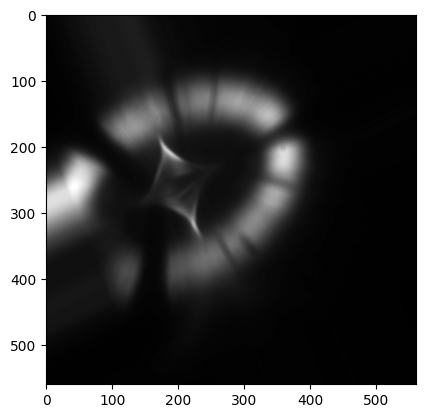

In [ ]:
plt.imshow(X_train[-1],cmap='gray')

error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/median_blur.simd.hpp:880: error: (-215:Assertion failed) src.depth() == CV_8U && (cn == 1 || cn == 3 || cn == 4) in function 'medianBlur'


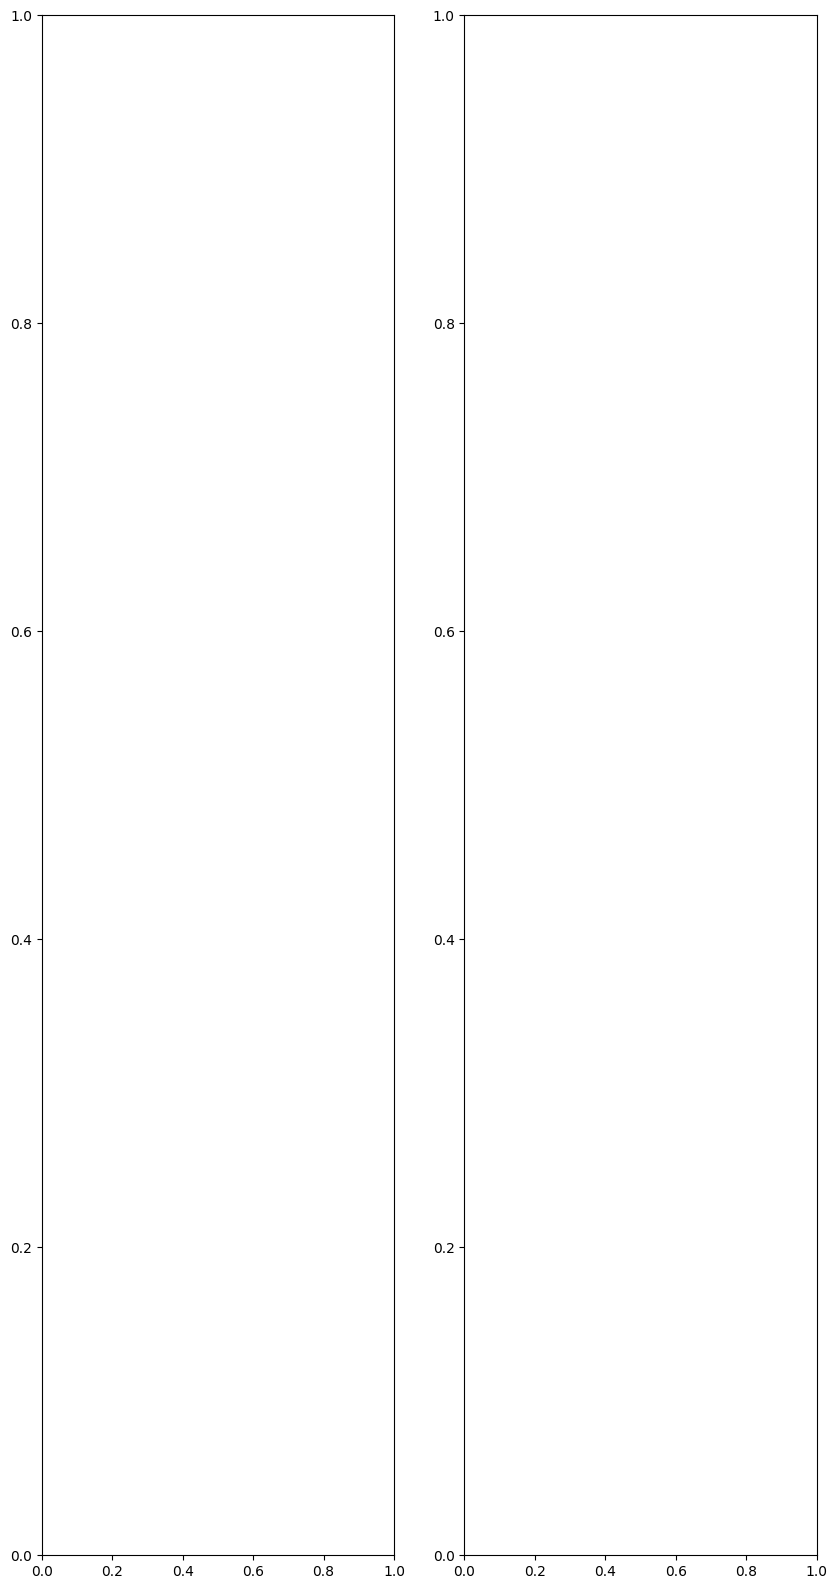

In [ ]:
fig,axs = plt.subplots(1,2,figsize=(10,20))
sample = X_train[-72].copy()
#sample = sample*(0.20)
#sample[sample<0.04] = 0.04
#minimum = np.min(sample)
#sample[sample<(minimum+5)] = (sample[sample<(minimum+5)] - minimum)*3 + minimum
for i in range(1):
  sample = cv2.medianBlur(sample, 51)
#sample[sample>0.2] = 0.2
#minimum = np.min(sample)
#sample = (sample-minimum)*10 + minimum
#sample[sample>0.2] = 0.2
axs[0].imshow(sample,cmap='gray')
axs[1].imshow(X_test_strange[0],cmap='gray')

In [ ]:
np.max(X_test_strange[0]), np.min(X_test_strange[0]), np.max(sample), np.min(sample)

In [ ]:
sns.distplot(X_test_strange[0])

In [ ]:
sns.distplot(sample)

In [ ]:
sample = X_train[-1] + 0.6
sample[sample>1] = 1
plt.imshow(sample,cmap='gray')

### Category creation

In [ ]:
#gc.collect()

X_train = np.array(X_train)
Y_train = np.array(Y_train, dtype="float32")
print("Shape of Train set's images: " + str(X_train.shape))
print("Shape of Train set's labels: " + str(Y_train.shape))

X_val = np.array(X_val)
Y_val = np.array(Y_val, dtype="float32")
print("Shape of Val set's images: " + str(X_val.shape))
print("Shape of Val set's labels: " + str(Y_val.shape))

X_test = np.array(X_test)
Y_test = np.array(Y_test, dtype="float32")
print("Shape of Test set's images: " + str(X_test.shape))
print("Shape of Test set's labels: " + str(Y_test.shape))

Shape of Train set's images: (5029, 560, 560)
Shape of Train set's labels: (5029, 3)
Shape of Val set's images: (1341, 560, 560)
Shape of Val set's labels: (1341, 3)
Shape of Test set's images: (862, 560, 560)
Shape of Test set's labels: (862, 3)


In [ ]:
#Y_train = Y_train[:,:3]
#Y_val = Y_val[:,:3]
#Y_test = Y_test[:,:3]

In [ ]:
binary = False
threshold1 = 10
threshold2 = 40
train_categories = []
val_categories = []
test_categories = []

if not binary:
  #1 in position 0 means good prediction, 1 in position 1 means bad prediction, 1 in position 2 means unavailable prediction
  for row in Y_train:
      if row[0] > threshold2:
          train_categories.append([0,0,1])
      elif row[0] > threshold1:
          train_categories.append([0,1,0])
      else:
          train_categories.append([1,0,0])

  train_categories = np.array(train_categories)

  for row in Y_val:
      if row[0] > threshold2:
          val_categories.append([0,0,1])
      elif row[0] > threshold1:
          val_categories.append([0,1,0])
      else:
          val_categories.append([1,0,0])

  val_categories = np.array(val_categories)

  for row in Y_test:
      if row[0] > threshold2:
          test_categories.append([0,0,1])
      elif row[0] > threshold1:
          test_categories.append([0,1,0])
      else:
          test_categories.append([1,0,0])

  test_categories = np.array(test_categories)
else:
  #0 means good prediction, 1 means unavailable prediction
  for row in Y_train:
      if row[0] > threshold1:
          train_categories.append([1])
      else:
          train_categories.append([0])

  train_categories = np.array(train_categories)

  for row in Y_val:
      if row[0] > threshold1:
          val_categories.append([1])
      else:
          val_categories.append([0])

  val_categories = np.array(val_categories)

  for row in Y_test:
      if row[0] > threshold1:
          test_categories.append([1])
      else:
          test_categories.append([0])

  test_categories = np.array(test_categories)

Y_train = np.hstack([Y_train, train_categories])
Y_val = np.hstack([Y_val, val_categories])
Y_test = np.hstack([Y_test, test_categories])


In [ ]:
Y_train.shape, Y_val.shape, Y_test.shape

((5029, 6), (1341, 6), (862, 6))

In [ ]:
np.mean(Y_train[:,3]), np.mean(Y_train[:,4]), np.mean(Y_train[:,5]) #labels distribution

(0.7251938755219726, 0.12427918075164049, 0.15052694372638695)

In [ ]:
X_train = np.expand_dims(X_train,3)
X_val = np.expand_dims(X_val,3)
X_test = np.expand_dims(X_test,3)

**Save dataset**

In [ ]:
import numpy as np

# Define the path to save the data
file_path = "preprocessed_dataset.npz"

# Save all datasets
np.savez_compressed(file_path,
                    X_train=X_train, Y_train=Y_train,
                    X_val=X_val, Y_val=Y_val,
                    X_test=X_test, Y_test=Y_test)

print(f"Dataset saved to {file_path}")


Dataset saved to preprocessed_dataset.npz


## Definition of the models

In [ ]:
def w_categorical_crossentropy(y_true, y_pred, weights):
  nb_cl = len(weights)
  final_mask = K.zeros_like(y_pred[:, 0])
  final_mask = tf.cast(final_mask,dtype=tf.float32)
  y_pred_max = K.max(y_pred, axis=1)
  y_pred_max = K.reshape(y_pred_max, (K.shape(y_pred)[0], 1))
  y_pred_max_mat = K.equal(y_pred, y_pred_max)
  y_pred_max_mat = tf.cast(y_pred_max_mat, dtype=tf.float32)
  y_true = tf.cast(y_true,dtype=tf.float32)
  for c_p, c_t in product(range(nb_cl), range(nb_cl)):
      final_mask += (weights[c_t, c_p] * y_pred_max_mat[:, c_p] * y_true[:, c_t])
  return K.categorical_crossentropy(y_pred, y_true) * final_mask


w_array = np.zeros((3,3))
w_array[1, 0] = 0.5
w_array[0, 1] = 0.4
w_array[0, 2] = 0.5
w_array[2, 0] = 0.3
w_array[2, 1] = 0.3
w_array[1, 2] = 0.3

ncce = partial(w_categorical_crossentropy, weights=w_array)

**eval_w_categorical_crossentropy FIXED**

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.backend as K
from itertools import product

# Fixed: Replaced in-place addition (+=) with final_mask = final_mask + (...) to avoid TensorFlow tensor modification error.
def eval_w_categorical_crossentropy(y_true, y_pred):
    weights = np.zeros((3, 3))
    weights[1, 0] = 0.5
    weights[0, 1] = 0.4
    weights[0, 2] = 0.5
    weights[2, 0] = 0.3
    weights[2, 1] = 0.3
    weights[1, 2] = 0.3
    nb_cl = len(weights)

    # Initialize final_mask correctly (no direct in-place updates)
    final_mask = K.zeros(K.shape(y_pred)[:1])

    final_mask = tf.cast(final_mask, dtype=tf.float32)
    y_pred_max = K.max(y_pred, axis=1, keepdims=True)
    y_pred_max_mat = K.equal(y_pred, y_pred_max)
    y_pred_max_mat = tf.cast(y_pred_max_mat, dtype=tf.float32)
    y_true = tf.cast(y_true, dtype=tf.float32)

    # Fix: Use an accumulative approach instead of modifying final_mask in place
    for c_p, c_t in product(range(nb_cl), range(nb_cl)):
        final_mask = final_mask + (weights[c_t, c_p] * y_pred_max_mat[..., c_p] * y_true[..., c_t])

    return K.categorical_crossentropy(y_true, y_pred) * final_mask  # Fix argument order


In [ ]:
def build_standard_model(input_shape, elastic_lambda, weighted_loss):

    #Input layer
    input_layer = tfkl.Input(shape=input_shape, name='input')

    #Convolutional block
    conv1 = tfkl.Conv2D(
        filters=16,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(input_layer)
    pool1 = tfkl.MaxPooling2D(pool_size = (2, 2))(conv1)
    conv2 = tfkl.Conv2D(
        filters=32,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'valid',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(pool1)
    pool2 = tfkl.MaxPooling2D(pool_size = (2, 2))(conv2)
    conv3 = tfkl.Conv2D(
        filters=48,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'valid',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(pool2)
    pool3 = tfkl.MaxPooling2D(pool_size = (2, 2))(conv3)

    conv4 = tfkl.Conv2D(
        filters=64,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(pool3)

    pool4 = tfkl.MaxPooling2D(pool_size = (2, 2))(conv4)

    conv5 = tfkl.Conv2D(
        filters=96,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'valid',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(pool4)

    pool5 = tfkl.MaxPooling2D(pool_size = (2, 2))(conv5)

    conv6 = tfkl.Conv2D(
        filters=128,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'swish',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(pool5)

    pool6 = tfkl.GlobalAveragePooling2D()(conv6)

    #Classification block
    classification_layer11 = tfkl.Dense(
        units=128,
        name='Classifier1',
        activation='relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed),
        kernel_regularizer=tf.keras.regularizers.L1L2(elastic_lambda,elastic_lambda)
    )(pool6)
    classification_layer11 = tfkl.Dropout(0.3, seed=seed)(classification_layer11)

    #Output layer
    out1 = tfkl.Dense(
        units=3,
        activation='softmax',
        kernel_initializer = tfk.initializers.GlorotUniform(seed),
        name='Output1'
    )(classification_layer11)

    model = tfk.Model(inputs=input_layer, outputs=out1, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics=[eval_w_categorical_crossentropy, 'accuracy', tfk.metrics.F1Score(average='macro')],run_eagerly=True)

    # Return the model
    return model

##Open Dataset

In [ ]:
%ls

drive/  sample_data/


In [ ]:
import numpy as np

# Define the path where the dataset is saved
file_path = "drive/MyDrive/HPPS_Nico/HPPS/Project/ModelClassification/Dataset/preprocessed_dataset.npz"

# Load the dataset
data = np.load(file_path)

# Extract variables
X_train, Y_train = data["X_train"], data["Y_train"]
X_val, Y_val = data["X_val"], data["Y_val"]
X_test, Y_test = data["X_test"], data["Y_test"]

print("Dataset successfully loaded!")

Dataset successfully loaded!


In [ ]:
print(f"X_train shape: {X_train.shape}, Y_train shape: {Y_train.shape}")
print(f"X_val shape: {X_val.shape}, Y_val shape: {Y_val.shape}")
print(f"X_test shape: {X_test.shape}, Y_test shape: {Y_test.shape}")


X_train shape: (5029, 560, 560, 1), Y_train shape: (5029, 6)
X_val shape: (1341, 560, 560, 1), Y_val shape: (1341, 6)
X_test shape: (862, 560, 560, 1), Y_test shape: (862, 6)


**Reshape for more efficient training**

In [ ]:
import numpy as np
import cv2

# Reshape function
def resize_images(images, target_size=(300, 300)):
    resized_images = []
    for img in images:
        img = img.squeeze()  # Convert (560, 560, 1) → (560, 560) safely
        img = cv2.resize(img.astype(np.float32), target_size, interpolation=cv2.INTER_AREA)  # Resize
        img = np.expand_dims(img, axis=-1)  # Restore channel: (300, 300, 1)
        resized_images.append(img)
    return np.array(resized_images, dtype=np.float32)  # Ensure correct dtype

# Apply resizing
X_train = resize_images(X_train)
X_val = resize_images(X_val)
X_test = resize_images(X_test)

# Check new shapes
print(f"X_train shape: {X_train.shape}")  # Expected: (5029, 300, 300, 1)
print(f"X_val shape: {X_val.shape}")      # Expected: (1341, 300, 300, 1)
print(f"X_test shape: {X_test.shape}")    # Expected: (862, 300, 300, 1)


X_train shape: (5029, 300, 300, 1)
X_val shape: (1341, 300, 300, 1)
X_test shape: (862, 300, 300, 1)


# Training

In [ ]:
lam = 1e-4
input_shape = X_train.shape[1:]
model = build_standard_model(input_shape, lam, ncce)
model.summary()

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                   │ (None, 300, 300, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 300, 300, 16)        │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 150, 150, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 148, 148, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 72, 72, 48)          │          13,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 36, 36, 48)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 36, 36, 64)          │          27,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 18, 18, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 96)          │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         110,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Classifier1 (Dense)                  │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 229,395 (896.07 KB)

 Trainable params: 229,395 (896.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#print(gc.collect())
history = model.fit(X_train,
                    #tf.cast(Y_train[:,3:], tf.float32),
                    Y_train[:,3:],
                    batch_size=16,
                    epochs=300,
                    #validation_data = (X_val,tf.cast(Y_val[:,3:], tf.float32)),
                    validation_data = (X_val, Y_val[:,3:]),
                    callbacks = [tfk.callbacks.EarlyStopping(monitor = 'val_eval_w_categorical_crossentropy', mode = 'min', patience = 10, restore_best_weights=True)]

).history

Epoch 1/300
315/315 ━━━━━━━━━━━━━━━━━━━━ 54s 172ms/step - accuracy: 0.8988 - eval_w_categorical_crossentropy: 0.0737 - f1_score: 0.8058 - loss: 0.3209 - val_accuracy: 0.9344 - val_eval_w_categorical_crossentropy: 0.0412 - val_f1_score: 0.9001 - val_loss: 0.2183
Epoch 2/300
315/315 ━━━━━━━━━━━━━━━━━━━━ 81s 170ms/step - accuracy: 0.9092 - eval_w_categorical_crossentropy: 0.0616 - f1_score: 0.8347 - loss: 0.2719 - val_accuracy: 0.9456 - val_eval_w_categorical_crossentropy: 0.0334 - val_f1_score: 0.9157 - val_loss: 0.1876
Epoch 3/300
315/315 ━━━━━━━━━━━━━━━━━━━━ 71s 227ms/step - accuracy: 0.9043 - eval_w_categorical_crossentropy: 0.0706 - f1_score: 0.8154 - loss: 0.2956 - val_accuracy: 0.9530 - val_eval_w_categorical_crossentropy: 0.0294 - val_f1_score: 0.9271 - val_loss: 0.1736
Epoch 4/300
315/315 ━━━━━━━━━━━━━━━━━━━━ 68s 182ms/step - accuracy: 0.9194 - eval_w_categorical_crossentropy: 0.0560 - f1_score: 0.8508 - loss: 0.2414 - val_accuracy: 0.9597 - val_eval_w_categorical_crossentropy: 0

KeyboardInterrupt: 

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])

NameError: name 'history' is not defined

In [ ]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.plot(history['f1_score'])
plt.plot(history['val_f1_score'])

NameError: name 'history' is not defined

In [ ]:
%cd drive/MyDrive/HPPS_Nico/HPPS/Project/ModelClassification/Weights

/content/drive/.shortcut-targets-by-id/1_uEu56UfwrBHAm5_JXL_gNVyl5kFHtG5/HPPS/Project/ModelClassification/Weights
brevitas_fullstandardmodel.pth      pytorch_fullmodel.pth
brevitas_standardmodel_weights.pth  pytorch_model_weights.pth


In [ ]:
%ls

brevitas_fullstandardmodel.pth      pytorch_fullmodel.pth      tensorflow_fullmodel.keras
brevitas_standardmodel_weights.pth  pytorch_model_weights.pth  tensorflow_model_weights.weights.h5


In [ ]:
model.save_weights("tensorflow_model_weights.weights.h5")
model.save("tensorflow_fullmodel.keras")

#Prediction

In [ ]:
%cd drive/MyDrive/HPPS_Nico/HPPS/Project/ModelClassification/Weights

%ls

/content/drive/.shortcut-targets-by-id/1_uEu56UfwrBHAm5_JXL_gNVyl5kFHtG5/HPPS/Project/ModelClassification/Weights
brevitas_fullstandardmodel.pth      pytorch_fullmodel.pth      tensorflow_fullmodel.keras
brevitas_standardmodel_weights.pth  pytorch_model_weights.pth  tensorflow_model_weights.weights.h5


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step
Test Accuracy: 0.8979


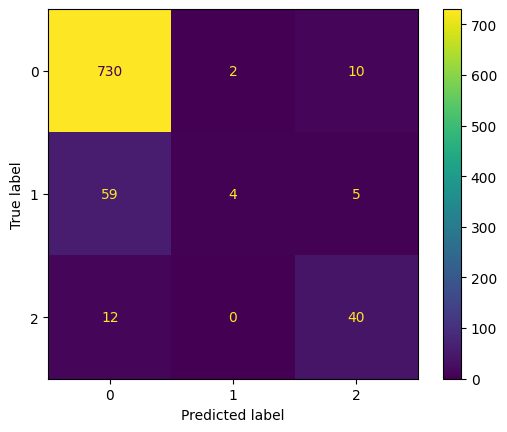

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Caricare il modello con i pesi
lam = 1e-4
input_shape = X_train.shape[1:]
model = build_standard_model(input_shape, lam, ncce)
model.load_weights("tensorflow_model_weights.weights.h5")
model.trainable = False  # Disattivare il training

# Funzione per fare le predizioni batch-wise
def predict_in_batches(model, X, batch_size=32):
    return np.argmax(model.predict(X, batch_size=batch_size), axis=-1)

# Predizioni sul test set
y_test_pred = predict_in_batches(model, X_test, batch_size=32)

# Calcolo dell'accuratezza
test_accuracy = np.mean(np.argmax(Y_test[:, 3:], axis=-1) == y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Matrice di confusione
cm = confusion_matrix(np.argmax(Y_test[:, 3:], axis=-1), y_test_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()


#Prediction on strange images

In [ ]:
# Caricamento del modello
lam = 1e-4
input_shape = X_test_strange.shape[1:]
model = build_standard_model(input_shape, lam, ncce)
model.load_weights("tensorflow_model_weights.weights.h5")
model.trainable = False  # Disattivare il training


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
%cd ..

/content/drive/.shortcut-targets-by-id/1_uEu56UfwrBHAm5_JXL_gNVyl5kFHtG5/HPPS/Project/ModelClassification


In [ ]:
%ls

Dataset/  Models/  Weights/


In [ ]:
%cd Dataset/

/content/drive/.shortcut-targets-by-id/1_uEu56UfwrBHAm5_JXL_gNVyl5kFHtG5/HPPS/Project/ModelClassification/Dataset


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 248ms/step
Strange Images Accuracy: 1.0000


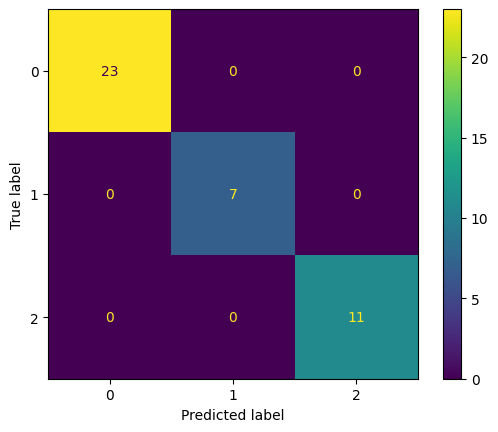

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Caricamento del CSV con le etichette delle immagini strane
class_labels_df = pd.read_csv("strange_images_classes.csv")

# Mappatura delle classi in base ai valori numerici
class_mapping = {0: 0, 30: 1, 100: 2}
y_strange_true = np.array([class_mapping[val] for val in class_labels_df["Classe"] if val in class_mapping])

# Percorso del dataset di immagini
dataset_path = "strange_images/Immagini"
valid_image_formats = (".jpg", ".jpeg", ".png", ".bmp", ".tiff")
IMAGE_SIZE = (300, 300)  # Dimensione fissa delle immagini

# Caricamento e preprocessing delle immagini
X_test_strange = []
image_filenames = sorted([img for img in os.listdir(dataset_path) if img.lower().endswith(valid_image_formats)])

for image_name in image_filenames:
    image_path = os.path.join(dataset_path, image_name)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Leggi in scala di grigi
    if image is not None:
        image = cv2.resize(image, IMAGE_SIZE)  # Resize
        image = image.astype('float32') / 255.0  # Normalizzazione
        X_test_strange.append(image)

# Convertire in array numpy e aggiungere il canale per TensorFlow
X_test_strange = np.array(X_test_strange)
X_test_strange = np.expand_dims(X_test_strange, axis=-1)  # Aggiunta della dimensione canale

# Funzione per la predizione batch-wise
def predict_in_batches(model, X, batch_size=32):
    return np.argmax(model.predict(X, batch_size=batch_size), axis=-1)

# Eseguire le predizioni
y_strange_pred = predict_in_batches(model, X_test_strange, batch_size=32)

# Verifica corrispondenza dimensioni tra predizioni e ground truth
if len(y_strange_pred) != len(y_strange_true):
    raise ValueError(f"Mismatch tra predizioni ({len(y_strange_pred)}) e ground truth ({len(y_strange_true)})!")

# Calcolo dell'accuratezza
strange_accuracy = np.mean(y_strange_true == y_strange_pred)
print(f"Strange Images Accuracy: {strange_accuracy:.4f}")

# Matrice di confusione
cm_strange = confusion_matrix(y_strange_true, y_strange_pred)
ConfusionMatrixDisplay(cm_strange).plot()
plt.show()


#Dataset Analysis

In [ ]:
%ls

DATASET_CLASSIFICATORESMALL/     preprocessed_dataset.npz  strange_images_classes.csv
DATASET_CLASSIFICATORESMALL.zip  README.gdoc
errors.csv                       strange_images/


In [ ]:
%cd drive/MyDrive/HPPS_Nico/HPPS/Project/ModelClassification/Dataset

%ls

/content/drive/.shortcut-targets-by-id/1_uEu56UfwrBHAm5_JXL_gNVyl5kFHtG5/HPPS/Project/ModelClassification/Weights
brevitas_fullstandardmodel.pth      pytorch_fullmodel.pth      tensorflow_fullmodel.keras
brevitas_standardmodel_weights.pth  pytorch_model_weights.pth  tensorflow_model_weights.weights.h5


Class Distribution:
Class
0    12295
1     1550
2     2820
Name: count, dtype: int64


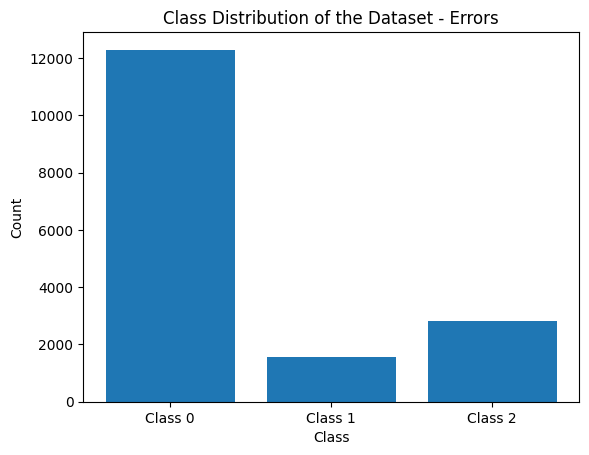

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "errors.csv"  # Change this if the filename is different
df = pd.read_csv(file_path)

# Extract the second column (ignoring the first column)
column_name = df.columns[1]
values = df[column_name]

# Define classification thresholds
threshold1 = 10
threshold2 = 40

# Classify values
def classify(value):
    if value <= threshold1:
        return 0
    elif value <= threshold2:
        return 1
    else:
        return 2

df['Class'] = values.apply(classify)

# Count class distribution
class_counts = df['Class'].value_counts().sort_index()

# Print statistics
print("Class Distribution:")
print(class_counts)

# Plot the class distribution
plt.bar(class_counts.index, class_counts.values, tick_label=["Class 0", "Class 1", "Class 2"])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution of the Dataset - Errors")
plt.show()


Class Distribution:
Class
0    23
1     7
2    11
Name: count, dtype: int64


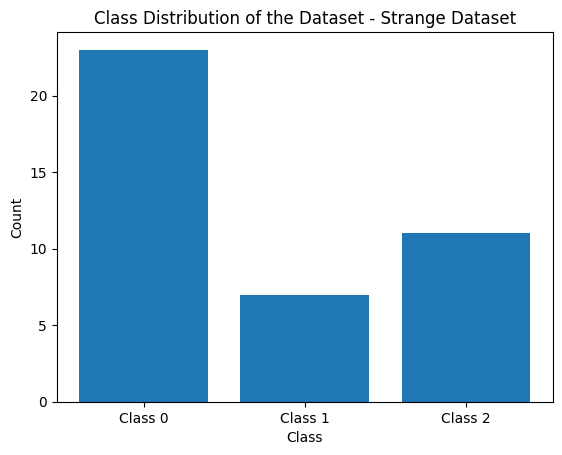

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "strange_images_classes.csv"  # Change this if the filename is different
df = pd.read_csv(file_path)

# Extract the second column (ignoring the first column)
column_name = df.columns[1]
values = df[column_name]

# Define classification thresholds
threshold1 = 10
threshold2 = 40

# Classify values
def classify(value):
    if value <= threshold1:
        return 0
    elif value <= threshold2:
        return 1
    else:
        return 2

df['Class'] = values.apply(classify)

# Count class distribution
class_counts = df['Class'].value_counts().sort_index()

# Print statistics
print("Class Distribution:")
print(class_counts)

# Plot the class distribution
plt.bar(class_counts.index, class_counts.values, tick_label=["Class 0", "Class 1", "Class 2"])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution of the Dataset - Strange Dataset")
plt.show()
